In [1]:
import pandas as pd

In [2]:
import requests
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000&q=*&sort=TimeStamp:desc'


In [3]:
response = requests.get(url=url, auth=auth)

In [4]:
response

<Response [200]>

In [5]:
import json
data = json.loads(response.text)

In [6]:
data

{'took': 971,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'IECltn8Bwa_bL2zR7u06',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 5,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648036798000,
     'Measurement': 'µg/m3'},
    'sort': [1648036798000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'hECltn8Bwa_bL2zR8O0r',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 8,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648036798000,
     'Measurement': 'µg/m3'},
    'sort': [1648036798000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'kUCltn8Bwa_bL2zR8O1b',
    '_score': None,
    '_source': {'Source': '

In [7]:
from pandas import json_normalize
dataframe = json_normalize(data['hits']['hits'])

In [8]:
dataframe

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,IECltn8Bwa_bL2zR7u06,None,[1648036798000],UradMonitor,pm1,5.0,45.589267,25.464450,1648036798000,µg/m3
1,brasov-dev,_doc,hECltn8Bwa_bL2zR8O0r,None,[1648036798000],UradMonitor,pm25,8.0,45.589267,25.464450,1648036798000,µg/m3
2,brasov-dev,_doc,kUCltn8Bwa_bL2zR8O1b,None,[1648036798000],UradMonitor,pm10,9.0,45.589267,25.464450,1648036798000,µg/m3
3,brasov-dev,_doc,B0Cltn8Bwa_bL2zR7O3k,None,[1648036797000],UradMonitor,pm1,6.0,45.704032,25.640955,1648036797000,µg/m3
4,brasov-dev,_doc,SECltn8Bwa_bL2zR7-0G,None,[1648036797000],UradMonitor,pm10,17.0,45.704032,25.640955,1648036797000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,brasov-dev,_doc,k0Dnn38Bwa_bL2zRK6I7,None,[1647655149000],UradMonitor,pm1,2.0,45.393240,25.442933,1647655149000,µg/m3
9996,brasov-dev,_doc,YUDCoH8Bwa_bL2zR56WR,None,[1647653894000],UradMonitor,pm1,8.0,45.653600,25.599000,1647653894000,µg/m3
9997,brasov-dev,_doc,YkDCoH8Bwa_bL2zR56WX,None,[1647653894000],UradMonitor,pm25,23.0,45.653600,25.599000,1647653894000,µg/m3
9998,brasov-dev,_doc,Y0DCoH8Bwa_bL2zR56Wz,None,[1647653894000],UradMonitor,pm10,29.0,45.653600,25.599000,1647653894000,µg/m3


<AxesSubplot:>

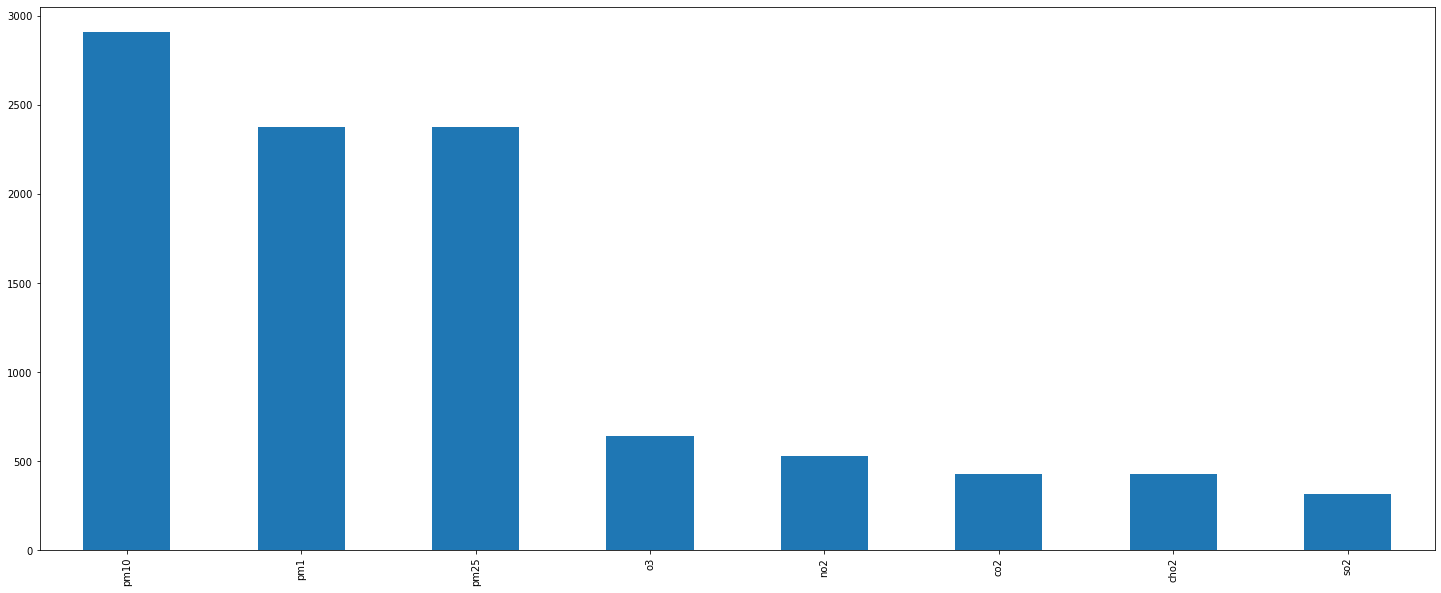

In [9]:
import matplotlib.pyplot as plt
hist_sensor = plt.figure(figsize = (25,10))
ax = hist_sensor.gca()

dataframe.get('_source.Sensor').value_counts().plot(kind='bar')

In [10]:
dataframe['LocationId'] = dataframe['_source.LocationLat']*10000000 + dataframe['_source.LocationLong']*10000000
dataframe['LocationName'] = ""
dataframe.loc[dataframe['LocationId'] == 712668900.0, 'LocationName'] = 'AFI' 
dataframe.loc[dataframe['LocationId'] == 712196290.0, 'LocationName'] = 'Bartolomeu1'
dataframe.loc[dataframe['LocationId'] == 712209000.0, 'LocationName'] = 'Bartolomeu2'
dataframe.loc[dataframe['LocationId'] == 712240750.0, 'LocationName'] = 'Bartolomeu3'
dataframe.loc[dataframe['LocationId'] == 708361730.0, 'LocationName'] = 'Bucegi'
dataframe.loc[dataframe['LocationId'] == 712682018.0, 'LocationName'] = 'Carrefour'
dataframe.loc[dataframe['LocationId'] == 712307300.0, 'LocationName'] = 'Centru1'
dataframe.loc[dataframe['LocationId'] == 712422000.0, 'LocationName'] = 'Centru2'
dataframe.loc[dataframe['LocationId'] == 712485560.0, 'LocationName'] = 'Centru3'
dataframe.loc[dataframe['LocationId'] == 712532529.0, 'LocationName'] = 'Centru4'
dataframe.loc[dataframe['LocationId'] == 711435090.0, 'LocationName'] = 'Codlea1'
dataframe.loc[dataframe['LocationId'] == 711587690.0, 'LocationName'] = 'Codlea2'
dataframe.loc[dataframe['LocationId'] == 712526000.0, 'LocationName'] = 'Colina1'
dataframe.loc[dataframe['LocationId'] == 712485000.0, 'LocationName'] = 'Colina2'
dataframe.loc[dataframe['LocationId'] == 711054930.0, 'LocationName'] = 'Cristian'
dataframe.loc[dataframe['LocationId'] == 712743216.0, 'LocationName'] = 'Gara'
dataframe.loc[dataframe['LocationId'] == 713825580.0, 'LocationName'] = 'Harman1'
dataframe.loc[dataframe['LocationId'] == 714030800.0, 'LocationName'] = 'Harman2'
dataframe.loc[dataframe['LocationId'] == 712560910.0, 'LocationName'] = 'Racadau'
dataframe.loc[dataframe['LocationId'] == 710537170.0, 'LocationName'] = 'Rasnov'
dataframe.loc[dataframe['LocationId'] == 713449870.0, 'LocationName'] = 'Sanpetru1'
dataframe.loc[dataframe['LocationId'] == 713500000.0, 'LocationName'] = 'Sanpetru2'
dataframe.loc[dataframe['LocationId'] == 712475170.0, 'LocationName'] = 'Saturn'
dataframe.loc[dataframe['LocationId'] == 712500331.0, 'LocationName'] = 'Stupini1'
dataframe.loc[dataframe['LocationId'] == 712571580.0, 'LocationName'] = 'Stupini2'
dataframe.loc[dataframe['LocationId'] == 712804610.0, 'LocationName'] = 'Tractorul'
dataframe.loc[dataframe['LocationId'] == 713218270.0, 'LocationName'] = 'TriajH'
dataframe.loc[dataframe['LocationId'] == 712783320.0, 'LocationName'] = 'Vlahuta1'
dataframe.loc[dataframe['LocationId'] == 712797770.0, 'LocationName'] = 'Vlahuta2'
dataframe.head(10)

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,brasov-dev,_doc,IECltn8Bwa_bL2zR7u06,None,[1648036798000],UradMonitor,pm1,5.0,45.589267,25.464450,1648036798000,µg/m3,710537170.0,Rasnov
1,brasov-dev,_doc,hECltn8Bwa_bL2zR8O0r,None,[1648036798000],UradMonitor,pm25,8.0,45.589267,25.464450,1648036798000,µg/m3,710537170.0,Rasnov
2,brasov-dev,_doc,kUCltn8Bwa_bL2zR8O1b,None,[1648036798000],UradMonitor,pm10,9.0,45.589267,25.464450,1648036798000,µg/m3,710537170.0,Rasnov
3,brasov-dev,_doc,B0Cltn8Bwa_bL2zR7O3k,None,[1648036797000],UradMonitor,pm1,6.0,45.704032,25.640955,1648036797000,µg/m3,713449870.0,Sanpetru1
4,brasov-dev,_doc,SECltn8Bwa_bL2zR7-0G,None,[1648036797000],UradMonitor,pm10,17.0,45.704032,25.640955,1648036797000,µg/m3,713449870.0,Sanpetru1
5,brasov-dev,_doc,ZUCltn8Bwa_bL2zR7-3W,None,[1648036797000],UradMonitor,pm25,14.0,45.704032,25.640955,1648036797000,µg/m3,713449870.0,Sanpetru1
6,brasov-dev,_doc,EECltn8Bwa_bL2zR7e2w,None,[1648036795000],UradMonitor,pm1,5.0,45.653600,25.599000,1648036795000,µg/m3,712526000.0,Colina1
7,brasov-dev,_doc,EkCltn8Bwa_bL2zR7e3D,None,[1648036795000],UradMonitor,pm25,12.0,45.653600,25.599000,1648036795000,µg/m3,712526000.0,Colina1
8,brasov-dev,_doc,XECltn8Bwa_bL2zR7-2K,None,[1648036795000],UradMonitor,pm10,16.0,45.653600,25.599000,1648036795000,µg/m3,712526000.0,Colina1
9,brasov-dev,_doc,FUCltn8Bwa_bL2zR7e3f,None,[1648036789000],UradMonitor,pm10,7.0,45.700748,25.442761,1648036789000,µg/m3,711435090.0,Codlea1


In [11]:
# dataframe.groupby(['LocationName']).size().reset_index().rename(columns={0:'count'})

<AxesSubplot:>

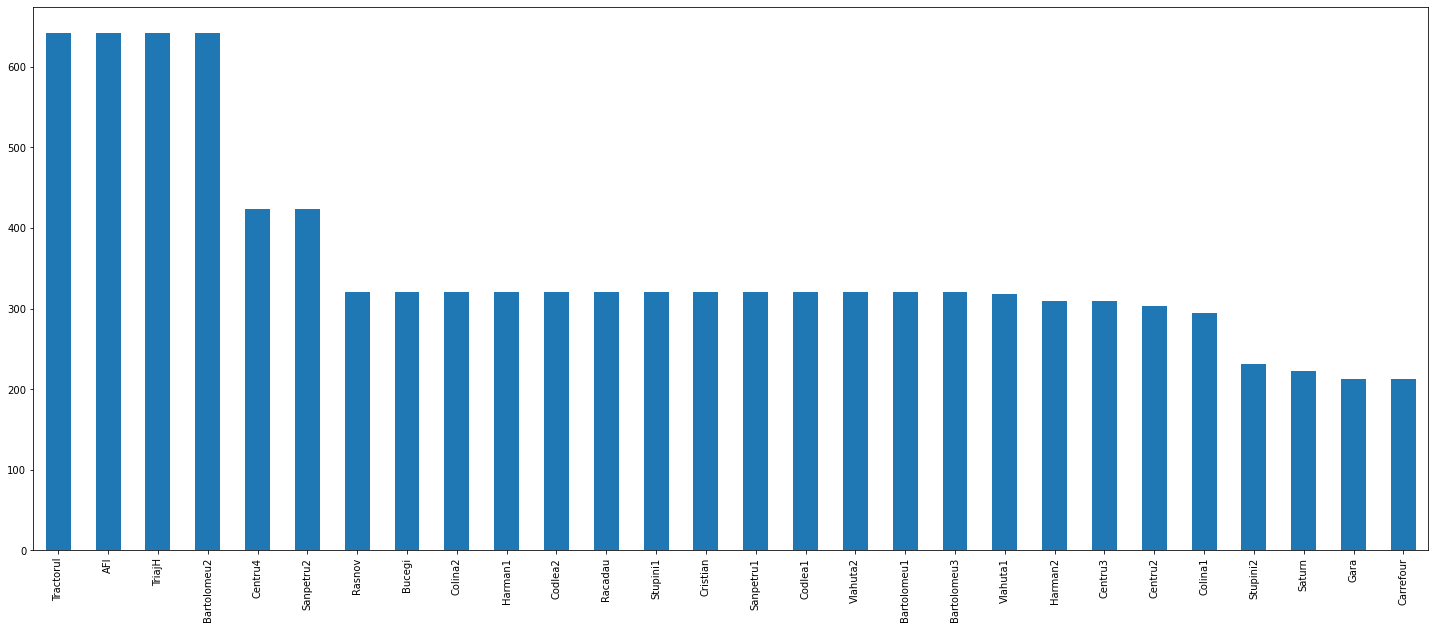

In [12]:
# hist_location = dataframe.get('LocationName').hist()
import matplotlib.pyplot as plt
hist_location = plt.figure(figsize = (25,10))
ax = hist_location.gca()
# dataframe.get('LocationName').hist(ax = ax)

dataframe.get('LocationName').value_counts().plot(kind='bar')
# dataframe.get('LocationName').value_counts(sort=False).plot.bar(rot=0)

In [13]:
dataframe_v2 = dataframe[[i for i in list(dataframe.columns) if i != '_index']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_type']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_id']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_score']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != 'sort']]
dataframe_v2.head(7)
# dataframe_v2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,UradMonitor,pm1,5.0,45.589267,25.464450,1648036798000,µg/m3,710537170.0,Rasnov
1,UradMonitor,pm25,8.0,45.589267,25.464450,1648036798000,µg/m3,710537170.0,Rasnov
2,UradMonitor,pm10,9.0,45.589267,25.464450,1648036798000,µg/m3,710537170.0,Rasnov
3,UradMonitor,pm1,6.0,45.704032,25.640955,1648036797000,µg/m3,713449870.0,Sanpetru1
4,UradMonitor,pm10,17.0,45.704032,25.640955,1648036797000,µg/m3,713449870.0,Sanpetru1
5,UradMonitor,pm25,14.0,45.704032,25.640955,1648036797000,µg/m3,713449870.0,Sanpetru1
6,UradMonitor,pm1,5.0,45.653600,25.599000,1648036795000,µg/m3,712526000.0,Colina1


In [14]:
cho2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'cho2']
co2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'co2']
no2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'no2']
o3 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'o3']
pm1 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm1']
pm10 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm10']
pm25 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm25']
so2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'so2']

In [15]:
print('Lungime dataframe: ',len(dataframe_v2))
print('Lungime dataframe cho2: ',len(cho2))
print('Lungime dataframe co2: ',len(co2))
print('Lungime dataframe no2: ',len(no2))
print('Lungime dataframe o3: ',len(o3))
print('Lungime dataframe pm1: ',len(pm1))
print('Lungime dataframe pm10: ',len(pm10))
print('Lungime dataframe pm25: ',len(pm25))
print('Lungime dataframe so2: ',len(so2))

Lungime dataframe:  10000
Lungime dataframe cho2:  428
Lungime dataframe co2:  428
Lungime dataframe no2:  530
Lungime dataframe o3:  640
Lungime dataframe pm1:  2375
Lungime dataframe pm10:  2906
Lungime dataframe pm25:  2375
Lungime dataframe so2:  318


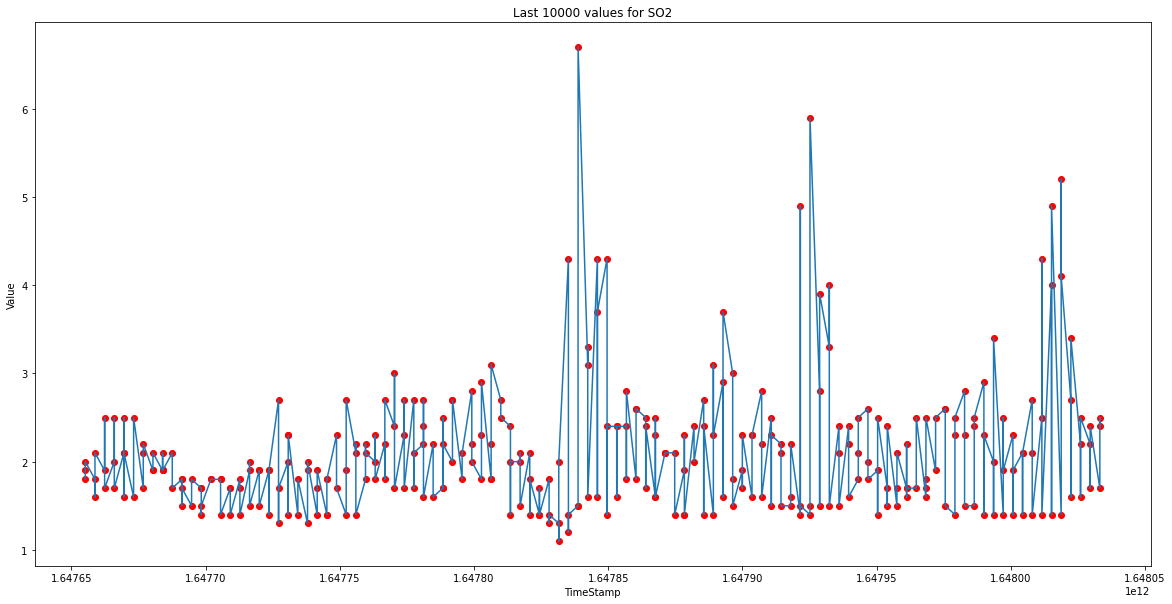

In [16]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2.get('_source.TimeStamp'), so2.get('_source.Value'))
plt.scatter(so2.get('_source.TimeStamp'), so2.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for SO2")
plt.savefig('plots/SO2.jpg', bbox_inches = 'tight')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [18]:
X = so2[["_source.TimeStamp"]].values
y = so2[["_source.Value"]].values

In [19]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [20]:
y_pred = regressor.predict(X)

In [21]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))
# float("{:.8f}".format(float(regressor.intercept_)))

Slope:  1.335073607764632e-09
Intercept:  -2197.8911876249585


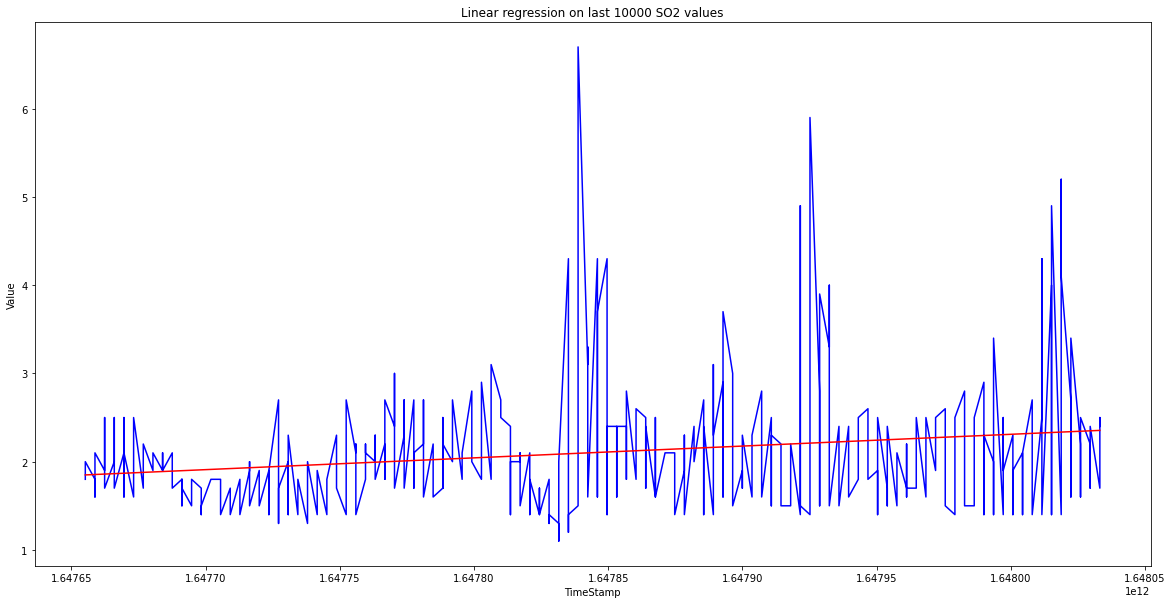

In [22]:
plt.figure(figsize=(20,10))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Linear regression on last 10000 SO2 values')
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.savefig('plots/SO2_regression.jpg', bbox_inches = 'tight')
plt.show()

In [23]:
so2.head(6) #Vlahuta1, Centru4, Sanpetru2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
85,Waqi,so2,2.4,45.654271,25.624061,1648033200000,µg/m3,712783320.0,Vlahuta1
86,Waqi,so2,2.5,45.649117,25.604136,1648033200000,µg/m3,712532529.0,Centru4
95,Waqi,so2,1.7,45.716700,25.633300,1648033200000,µg/m3,713500000.0,Sanpetru2
179,Waqi,so2,2.4,45.649117,25.604136,1648029600000,µg/m3,712532529.0,Centru4
183,Waqi,so2,1.7,45.716700,25.633300,1648029600000,µg/m3,713500000.0,Sanpetru2
190,Waqi,so2,2.2,45.654271,25.624061,1648029600000,µg/m3,712783320.0,Vlahuta1


In [24]:
so2_vlahuta1 = so2[so2.get('LocationName') == 'Vlahuta1']
so2_centru4 = so2[so2.get('LocationName') == 'Centru4']
so2_sanpetru2 = so2[so2.get('LocationName') == 'Sanpetru2']

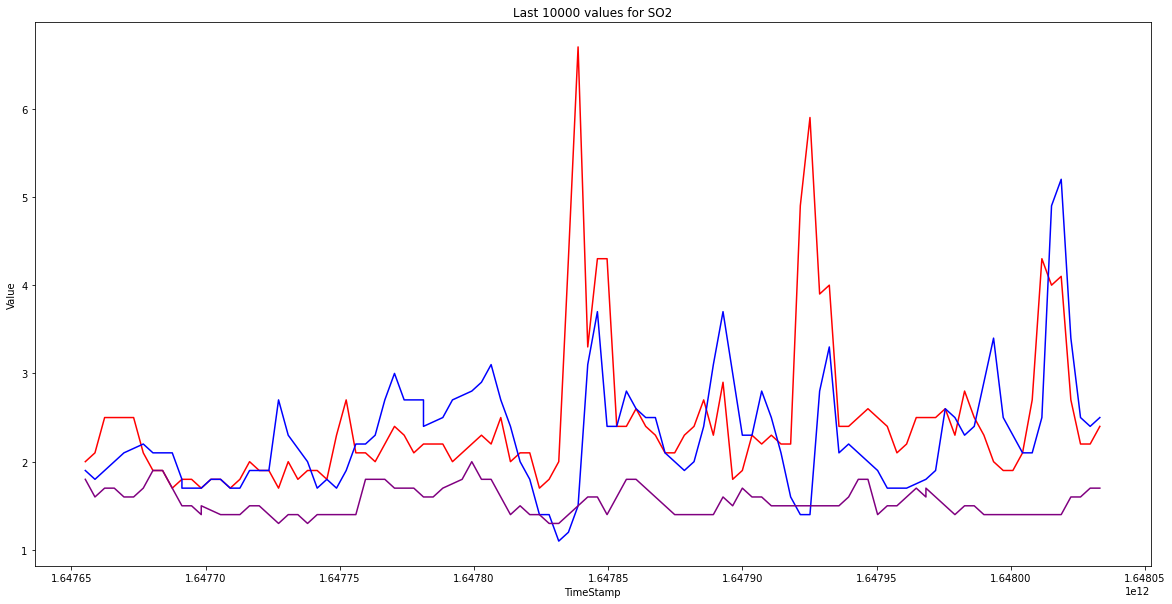

In [25]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(so2_vlahuta1.get('_source.TimeStamp'), so2_vlahuta1.get('_source.Value'), color = "red")
plt.plot(so2_centru4.get('_source.TimeStamp'), so2_centru4.get('_source.Value'), color = "blue")
plt.plot(so2_sanpetru2.get('_source.TimeStamp'), so2_sanpetru2.get('_source.Value'), color = "purple")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for SO2")
plt.savefig('plots/SO2_all.jpg', bbox_inches = 'tight')
plt.show()

In [26]:
pm10_bartolomeu1 = pm10[pm10.get('LocationName') == 'Bartolomeu1']
pm10_bartolomeu2 = pm10[pm10.get('LocationName') == 'Bartolomeu2']
pm10_bartolomeu3 = pm10[pm10.get('LocationName') == 'Bartolomeu3']

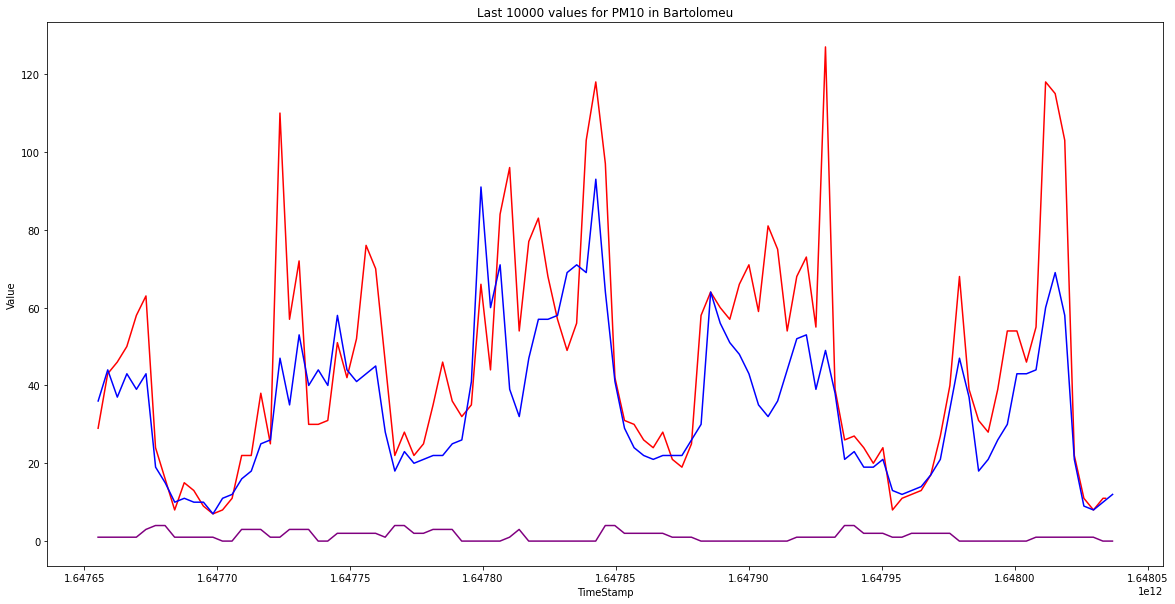

In [27]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_bartolomeu1.get('_source.TimeStamp'), pm10_bartolomeu1.get('_source.Value'), color = "red")
plt.plot(pm10_bartolomeu2.get('_source.TimeStamp'), pm10_bartolomeu2.get('_source.Value'), color = "blue")
plt.plot(pm10_bartolomeu3.get('_source.TimeStamp'), pm10_bartolomeu3.get('_source.Value'), color = "purple")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for PM10 in Bartolomeu")
plt.savefig('plots/PM10_Bartolomeu.jpg', bbox_inches = 'tight')
plt.show()

In [28]:
pm10_centru1 = pm10[pm10.get('LocationName') == 'Centru1']
pm10_centru2 = pm10[pm10.get('LocationName') == 'Centru2']
pm10_centru3 = pm10[pm10.get('LocationName') == 'Centru3']
pm10_centru4 = pm10[pm10.get('LocationName') == 'Centru4']

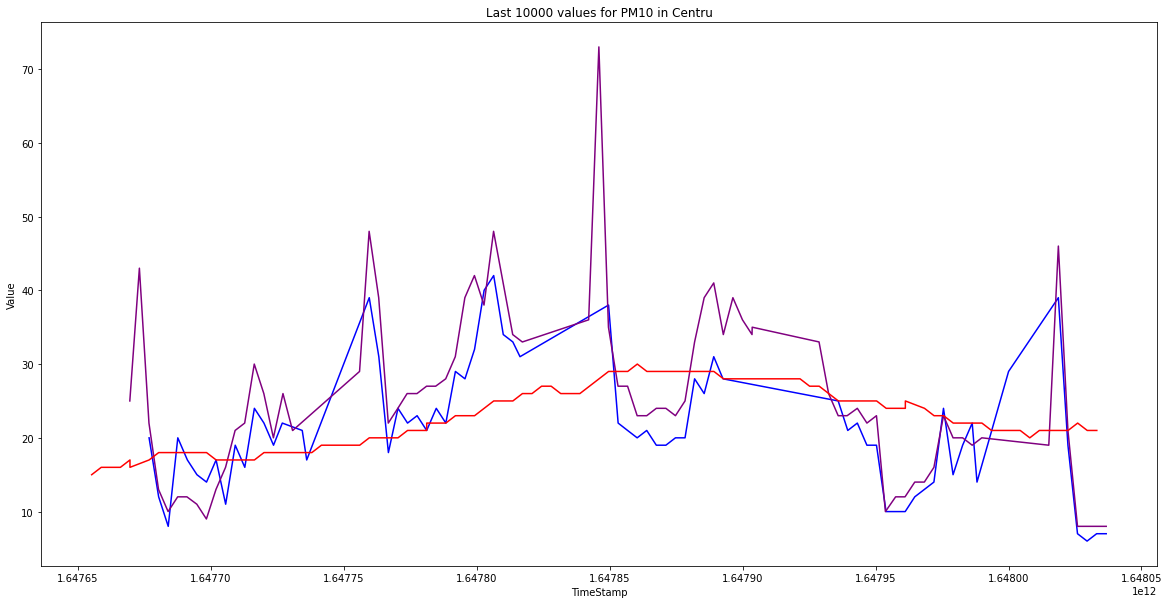

In [29]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
# plt.plot(pm10_centru1.get('_source.TimeStamp'), pm10_centru1.get('_source.Value'), color = "red")
plt.plot(pm10_centru2.get('_source.TimeStamp'), pm10_centru2.get('_source.Value'), color = "blue")
plt.plot(pm10_centru3.get('_source.TimeStamp'), pm10_centru3.get('_source.Value'), color = "purple")
plt.plot(pm10_centru4.get('_source.TimeStamp'), pm10_centru4.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for PM10 in Centru")
plt.savefig('plots/PM10_Centru.jpg', bbox_inches = 'tight')
plt.show()

In [30]:
pm10_carrefour = pm10[pm10.get('LocationName') == 'Carrefour']
pm10_afi = pm10[pm10.get('LocationName') == 'AFI']
pm10_gara = pm10[pm10.get('LocationName') == 'Gara']

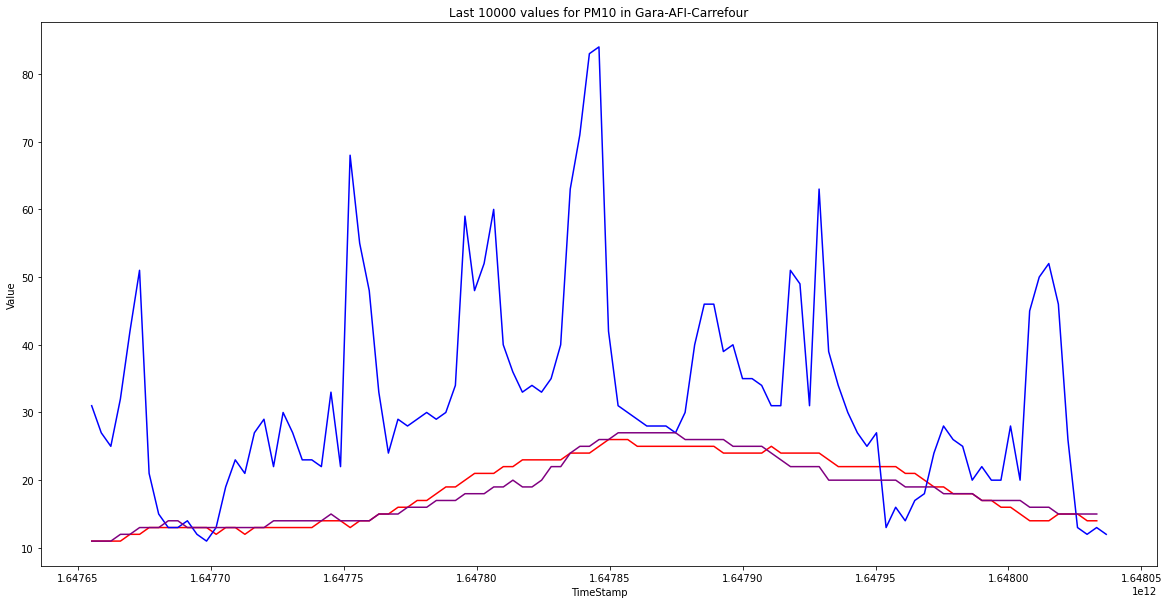

In [31]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_carrefour.get('_source.TimeStamp'), pm10_carrefour.get('_source.Value'), color = "red")
plt.plot(pm10_afi.get('_source.TimeStamp'), pm10_afi.get('_source.Value'), color = "blue")
plt.plot(pm10_gara.get('_source.TimeStamp'), pm10_gara.get('_source.Value'), color = "purple")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for PM10 in Gara-AFI-Carrefour")
plt.savefig('plots/PM10_G-A-C.jpg', bbox_inches = 'tight')
plt.show()